In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # y.view() is to reshape the tensor

n_samples, n_features = X.shape

In [15]:
# define the model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [16]:
# define loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# construct training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss calculation
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # weight update
    optimizer.step()
    
    # zero the gradient
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: loss = {loss.item():.4f}")

Epoch 10: loss = 4446.3345
Epoch 20: loss = 3315.5889
Epoch 30: loss = 2497.6062
Epoch 40: loss = 1905.2360
Epoch 50: loss = 1475.8214
Epoch 60: loss = 1164.2454
Epoch 70: loss = 937.9773
Epoch 80: loss = 773.5312
Epoch 90: loss = 653.9285
Epoch 100: loss = 566.8826


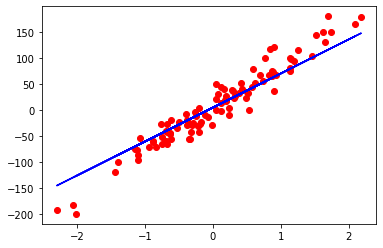

In [19]:
# plot
predicted = model(X).detach().numpy() # set requires_grad = False
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()